## Imporing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the Training and Testing Data
> label “0”: Positive Sentiment

> label “1”: Negative Sentiment






In [2]:
train_tweets = pd.read_csv("Twitter-Sentiment-Analysis-Supervised-Learning/Data/train_tweets.csv")
print(train_tweets.shape)
train_tweets.head()

(31962, 3)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Analyzing the data

In [3]:
import seaborn as sns

In [4]:
print(train_tweets.shape)
print(train_tweets.info())

(31962, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


In [5]:
train_tweets['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


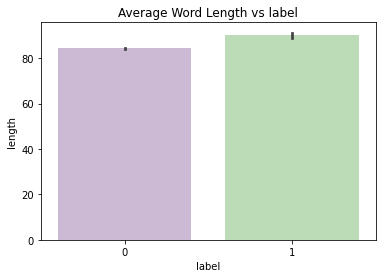

In [6]:
train_tweets['length'] = train_tweets['tweet'].apply(len)
fig1 = sns.barplot('label', 'length', data = train_tweets,palette='PRGn')
plt.title('Average Word Length vs label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')

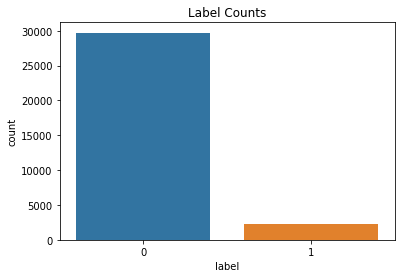

In [7]:
fig2 = sns.countplot(x='label',data = train_tweets)
plt.title('Label Counts')
plot = fig2.get_figure()
plot.savefig('Count Plot.png')

## Preprocessing the tweets

In [8]:
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
def text_processing(tweet):    
  #Generating the list of words in the tweet (hastags and other punctuations removed)
  def form_sentence(tweet):
      tweet_blob = TextBlob(tweet)
      return ' '.join(tweet_blob.words)
  new_tweet = form_sentence(tweet)
  
  #Removing stopwords and words with unusual symbols
  def no_user_alpha(tweet):
      tweet_list = [ele for ele in tweet.split() if ele != 'user']
      clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
      clean_s = ' '.join(clean_tokens)
      clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
      return clean_mess
  no_punc_tweet = no_user_alpha(new_tweet)
  
  #Normalizing the words in tweets 
  def normalization(tweet_list):
      lem = WordNetLemmatizer()
      normalized_tweet = []
      for word in tweet_list:
          normalized_text = lem.lemmatize(word,'v')
          normalized_tweet.append(normalized_text)
      return normalized_tweet  
  
  return normalization(no_punc_tweet)


In [10]:
train_tweets['tweet_list'] = train_tweets['tweet'].apply(text_processing)

In [11]:
# Calculating maximum length of tweet
max_len = 0
for i in train_tweets.length:
  max_len = max(max_len, i)
print(max_len)

274


In [12]:
print(train_tweets.head())

   id  label  ... length                                         tweet_list
0   1      0  ...    102  [father, dysfunctional, selfish, drag, kid, dy...
1   2      0  ...    122  [thank, lyft, credit, ca, use, cause, offer, w...
2   3      0  ...     21                                  [bihday, majesty]
3   4      0  ...     86                    [model, love, u, take, u, time]
4   5      0  ...     39                  [factsguide, society, motivation]

[5 rows x 5 columns]


## One Hot Representation

In [13]:
tweets = train_tweets['tweet_list']
vocab_size = 10000
final_tweets = []

for tweet in tweets:
  corpus = []
  for word in tweet:    
    one_hot_rep = one_hot(word, 10000)
    for i in one_hot_rep:
      corpus.append(i)
  final_tweets.append(corpus)

embedded_docs=pad_sequences(final_tweets, padding='pre', maxlen=max_len)
final_training_data = embedded_docs
print(final_training_data[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

## Creating the model

In [14]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [15]:
X = np.array(final_training_data)
y = np.array(train_tweets['label'])

In [16]:
# Train test slit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

25569 25569
6393 6393


In [17]:
embedding_vector_features=40

model = models.Sequential()
model.add(layers.Embedding(vocab_size, embedding_vector_features, input_length=max_len))
model.add(layers.Dropout(0.3))
model.add(layers.LSTM(100))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 274, 40)           400000    
_________________________________________________________________
dropout (Dropout)            (None, 274, 40)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=3, batch_size=32)

Epoch 1/3
800/800 [==============================] - 212s 262ms/step - loss: 0.2541 - accuracy: 0.9353 - val_loss: 0.2208 - val_accuracy: 0.9320
Epoch 2/3
800/800 [==============================] - 229s 286ms/step - loss: 0.1661 - accuracy: 0.9475 - val_loss: 0.2265 - val_accuracy: 0.9575
Epoch 3/3
800/800 [==============================] - 223s 279ms/step - loss: 0.1588 - accuracy: 0.9581 - val_loss: 0.2032 - val_accuracy: 0.9476


## Testing the model

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
y_pred = model.predict_classes(X_test)
confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[5759,  178],
       [ 157,  299]])

In [21]:
print(y_test[2])
print(y_pred[2][0])

0
0


In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

200/200 [==============================] - 12s 60ms/step - loss: 0.2032 - accuracy: 0.9476
Loss:  0.20321416854858398
Accuracy:  0.947598934173584
